# Chapter 2: Your First Learning Program

## Pizza and Correlation

In [1]:
import numpy as np
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [2]:
print(X[0:5], Y[0:5])

[13.  2. 14. 23. 13.] [33. 16. 32. 51. 27.]


In [3]:
Y

array([33., 16., 32., 51., 27., 16., 34., 17., 29., 15., 15., 32., 22.,
       37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27., 37.,
       17., 18., 25., 23.])

In [4]:
# Show matplot charts inside this Jupyter Notebook
%matplotlib inline

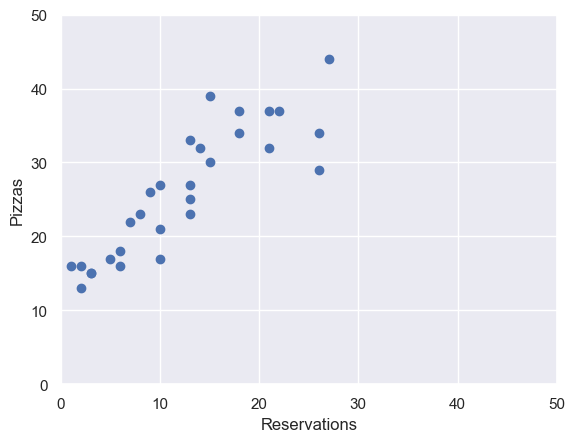

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.show()

## Tracing a Line

In [6]:
def predict(X, w):
    return X * w

In [7]:
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

In [8]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w

    raise Exception("Couldn't converge within %d iterations" % iterations)

In [9]:
w = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f" % w)
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

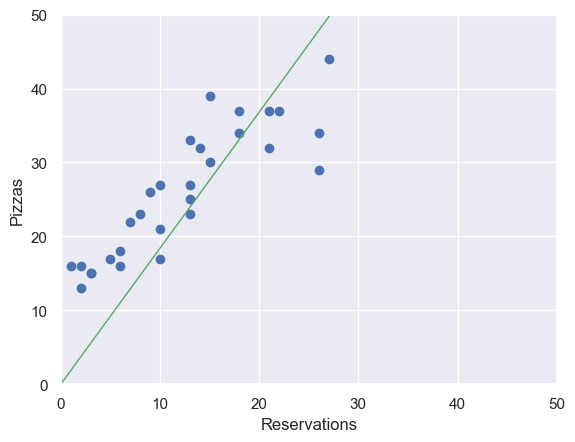

In [10]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
plt.ion()
plt.show()

## Adding a Bias

In [11]:
def predict(X, w, b):
    return X * w + b


def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)

In [12]:
w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

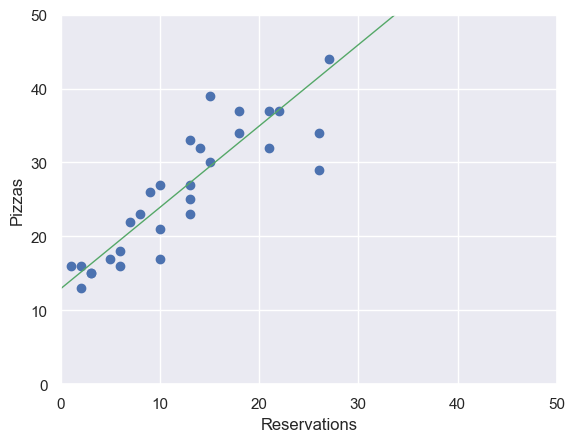

In [13]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.ion()
plt.show()